In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_png { height: auto; }</style>"))
import pickle
import numpy as np
import awkward as ak
import hist
import mplhep as hep

In [2]:
signalFile = "output_ttHTobb_2018_bbFatJet.coffea"
fSignal = load(signalFile)
bgFile = "output_TTbbDiLeptonic_Powheg_2018_bbFatJet.coffea"
fBG = load(bgFile)

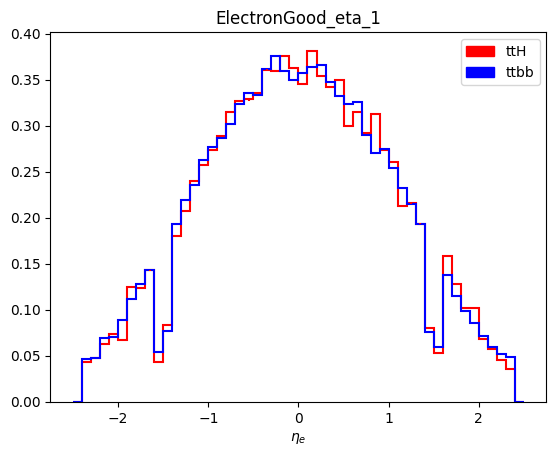

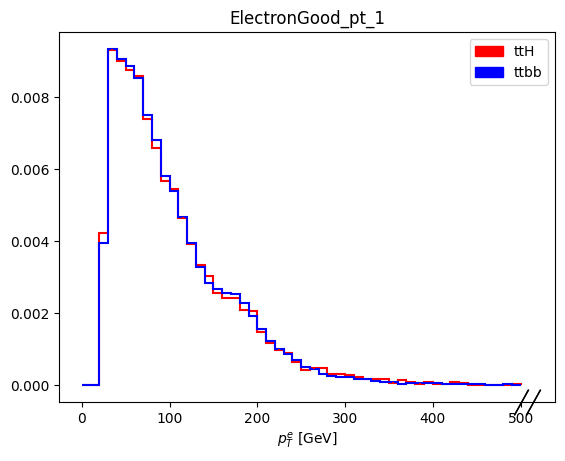

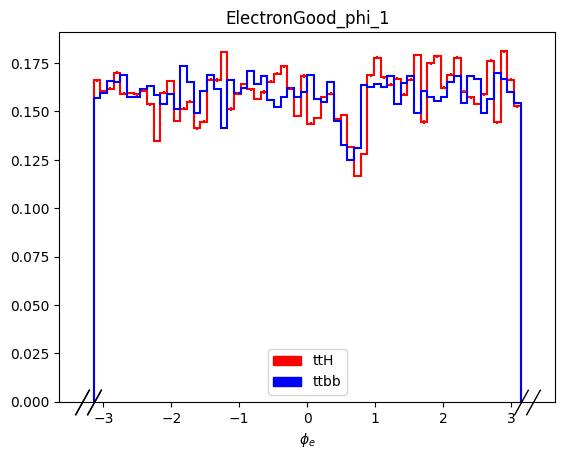

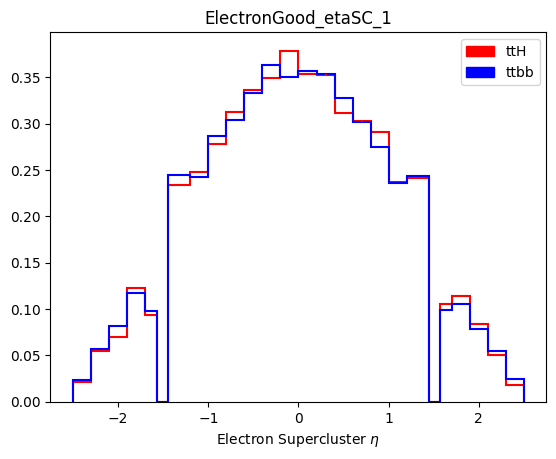

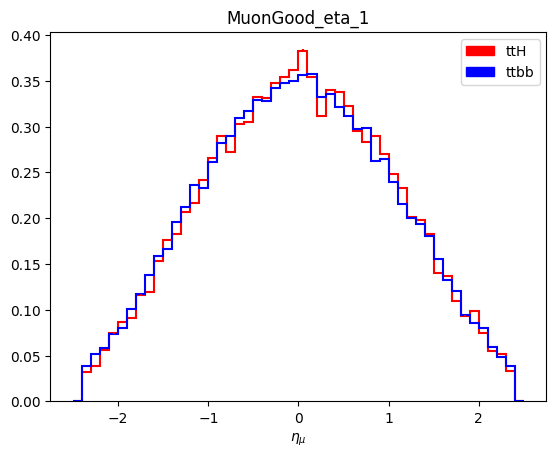

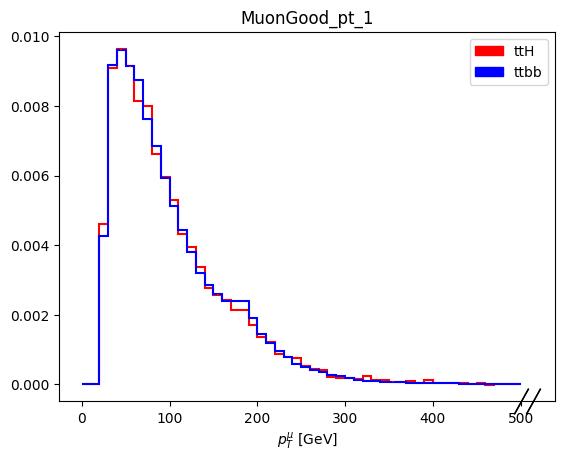

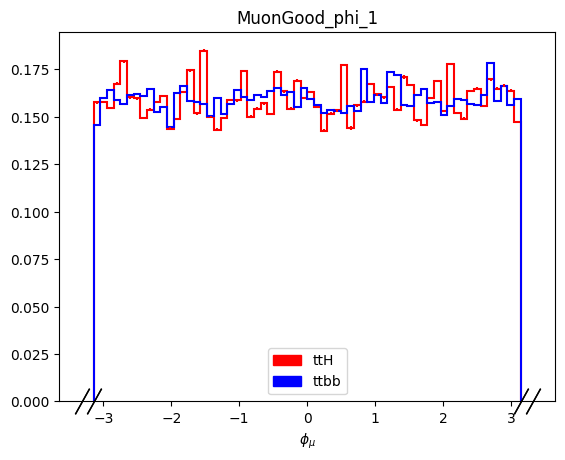

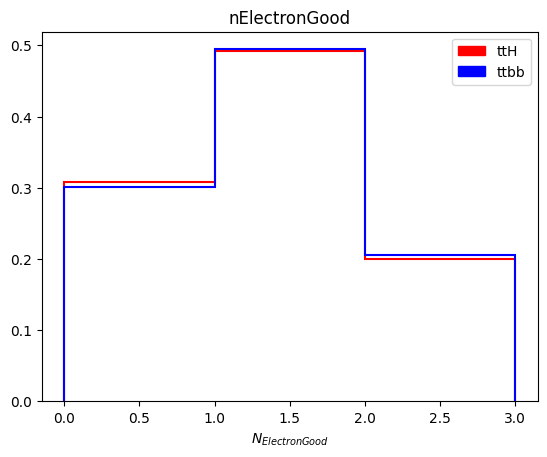

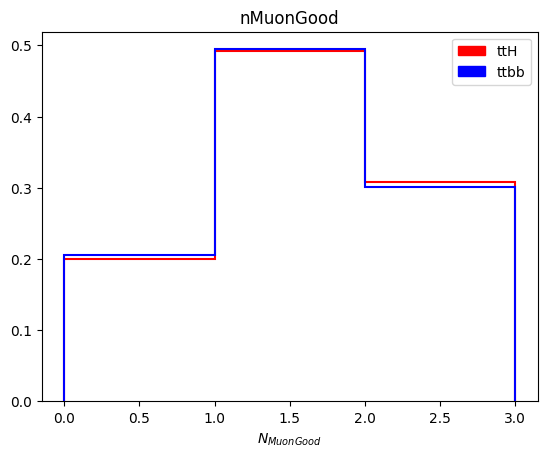

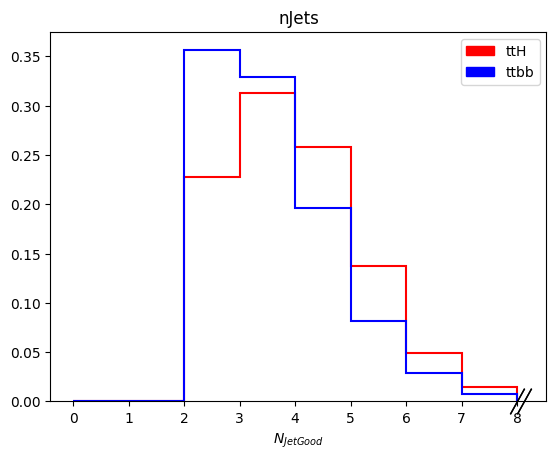

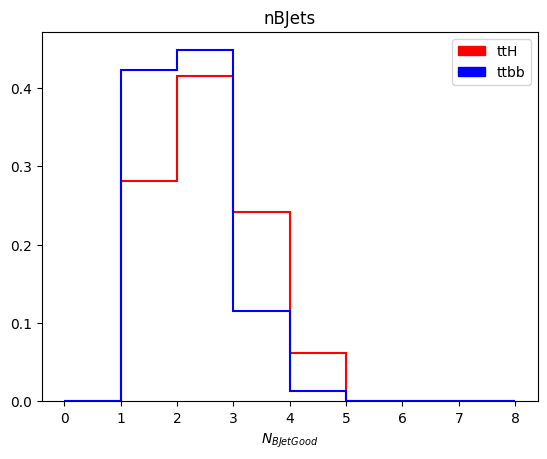

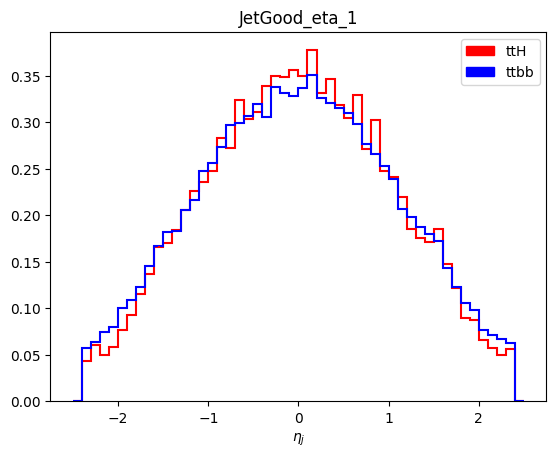

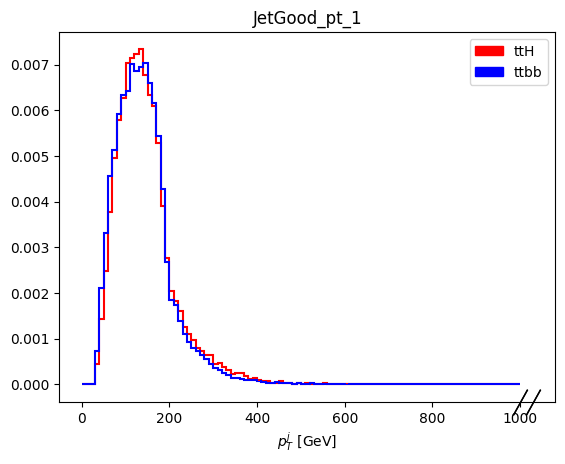

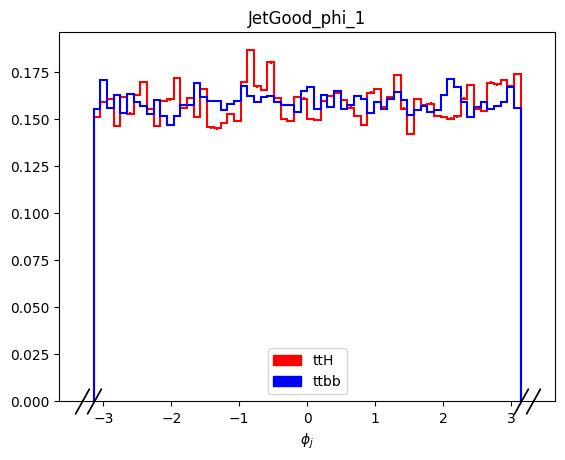

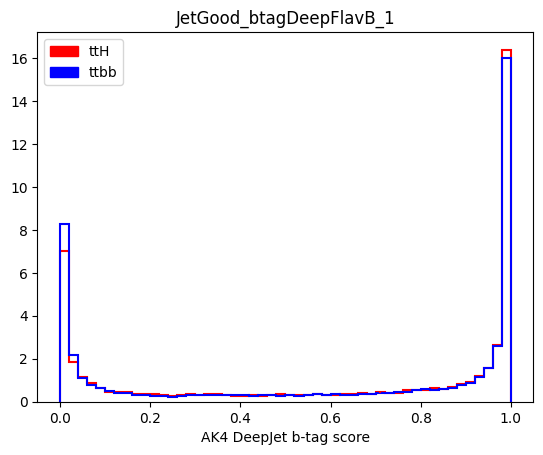

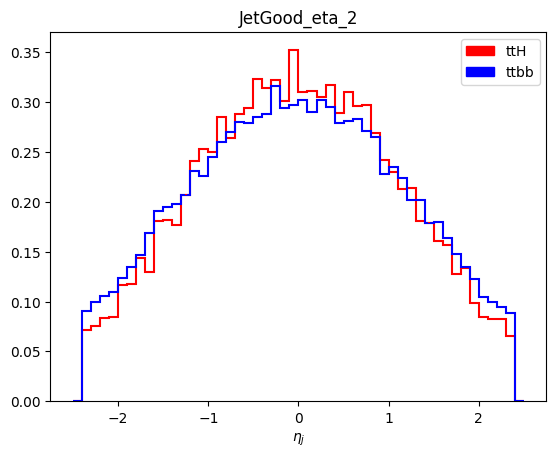

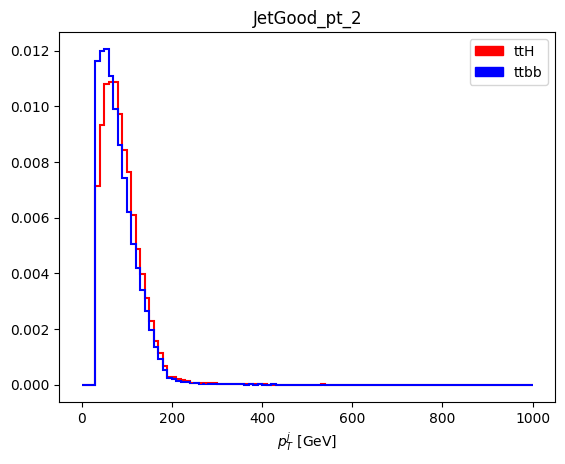

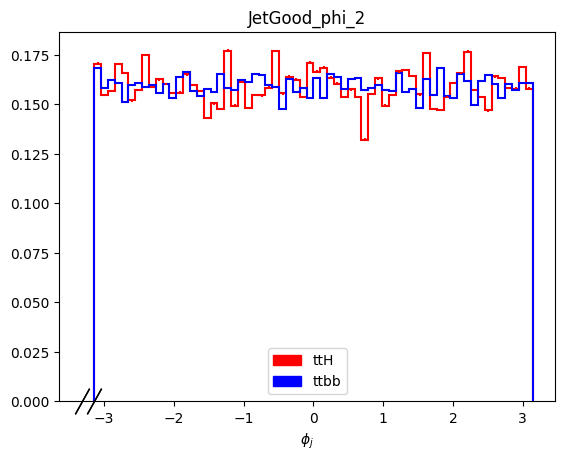

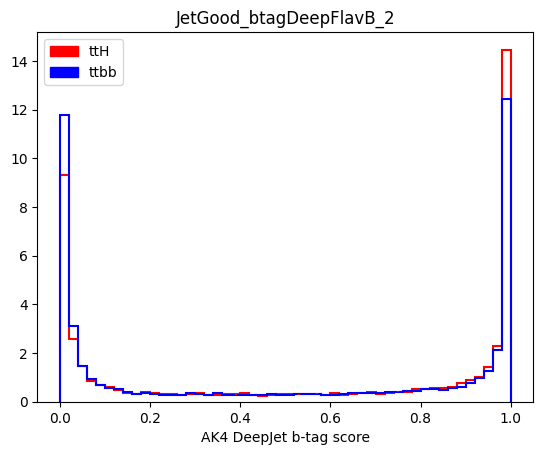

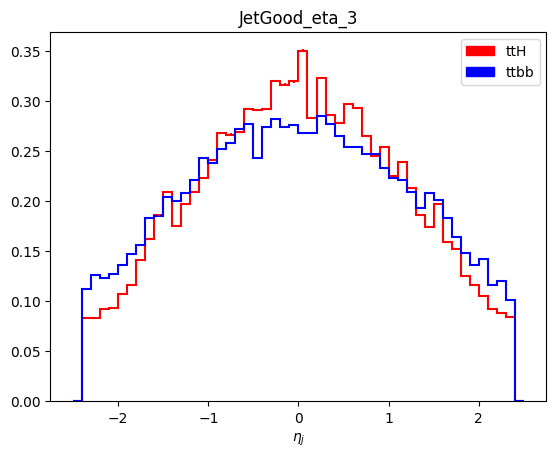

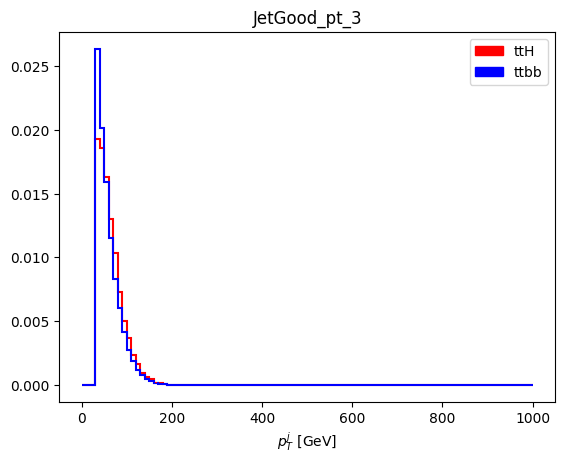

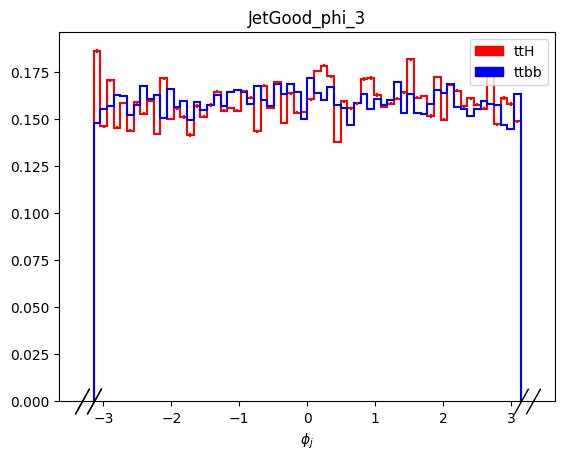

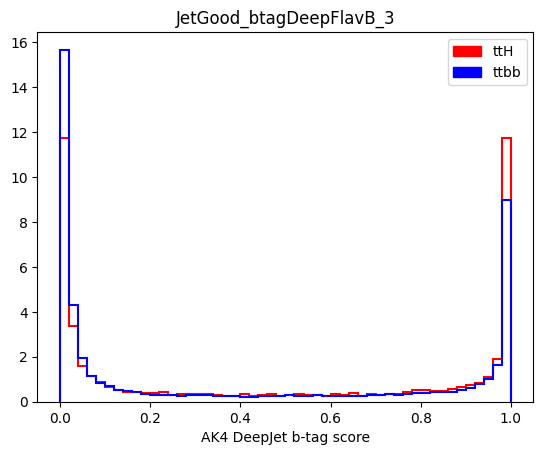

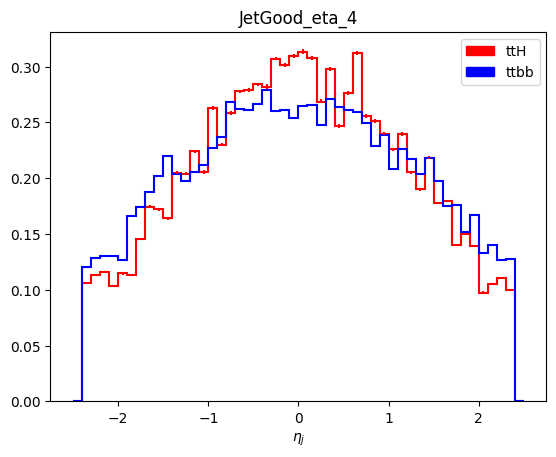

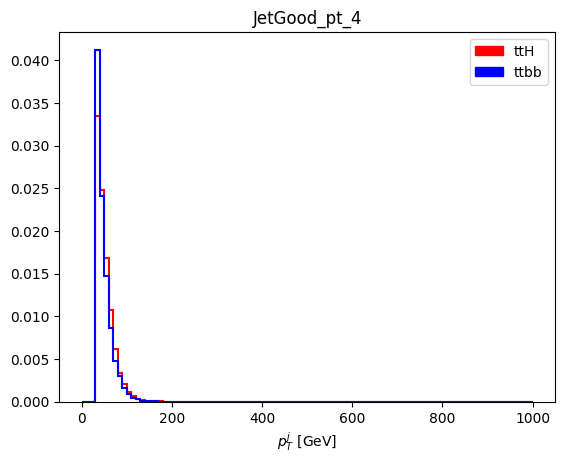

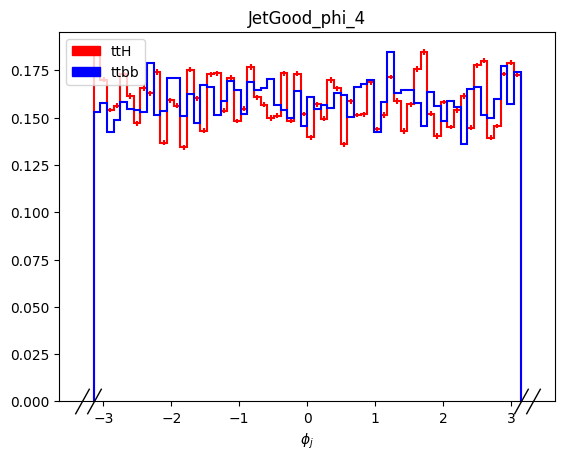

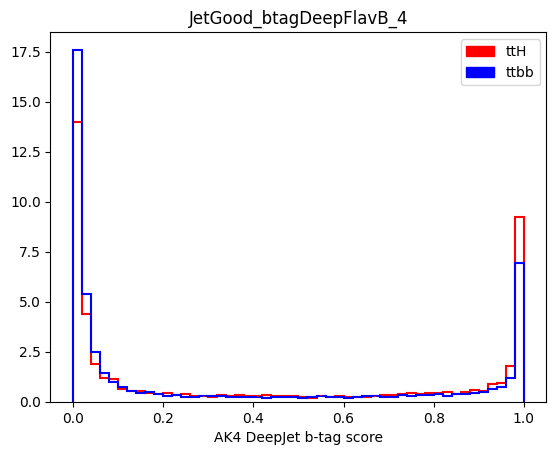

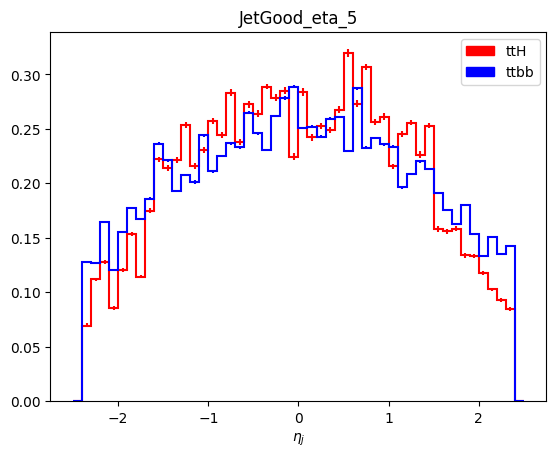

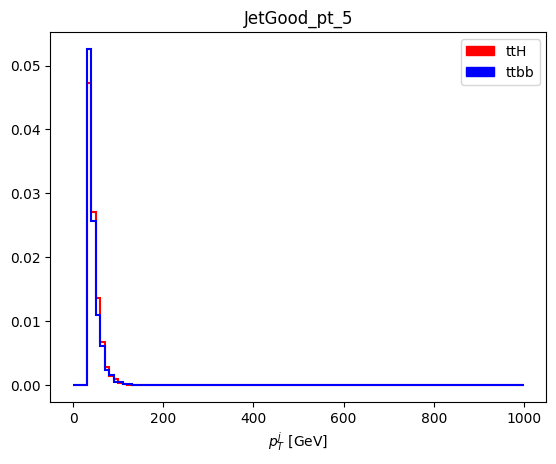

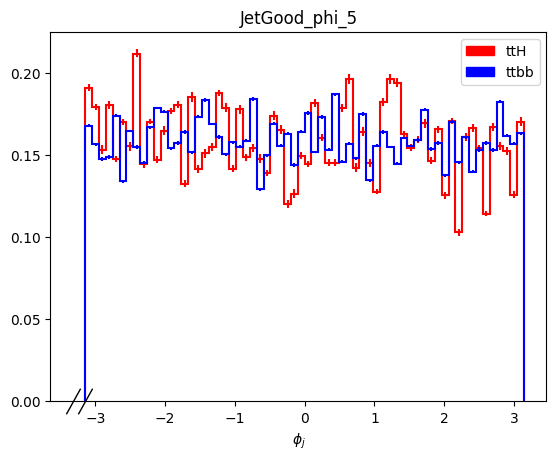

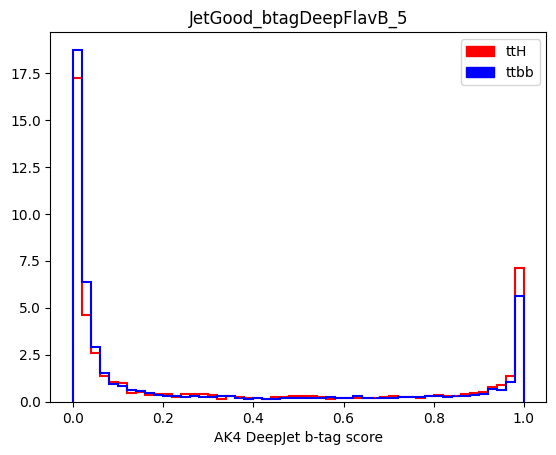

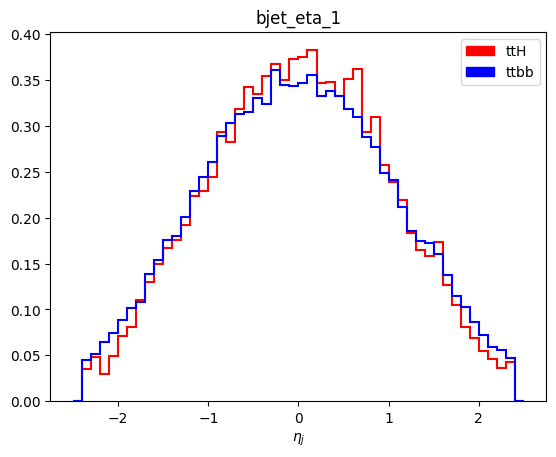

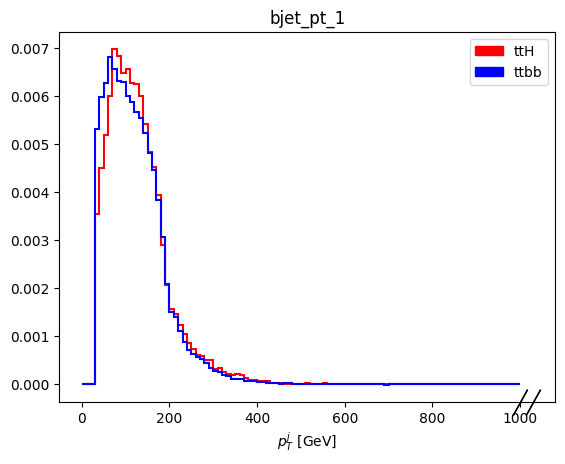

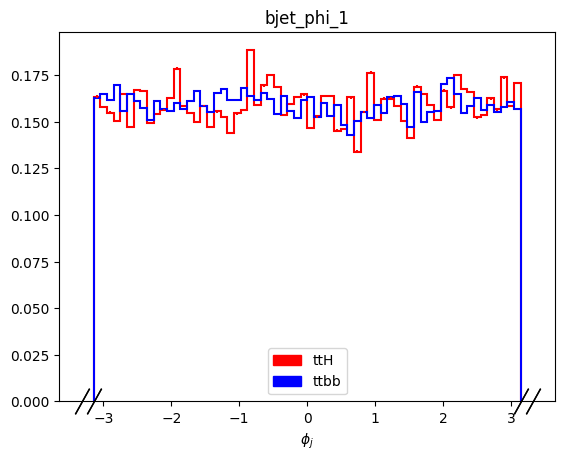

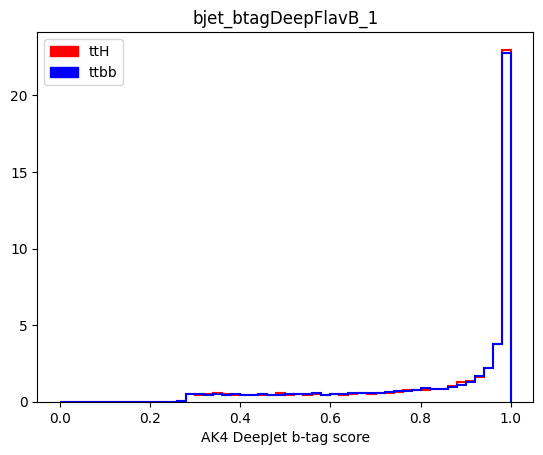

/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


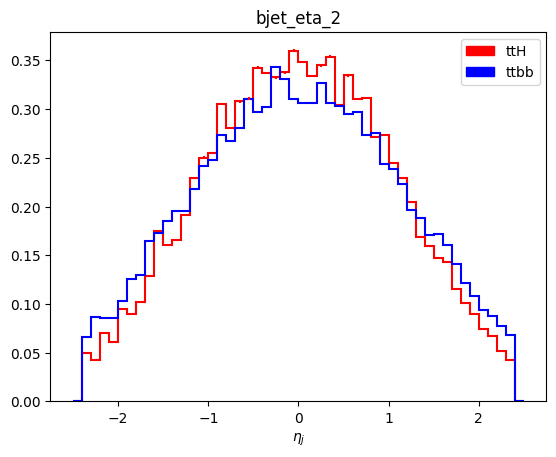

/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


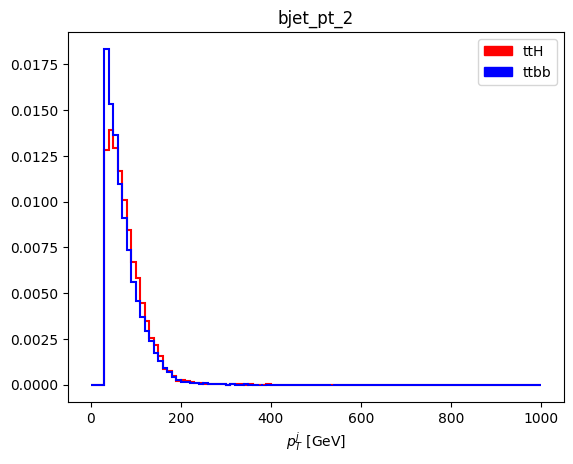

/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


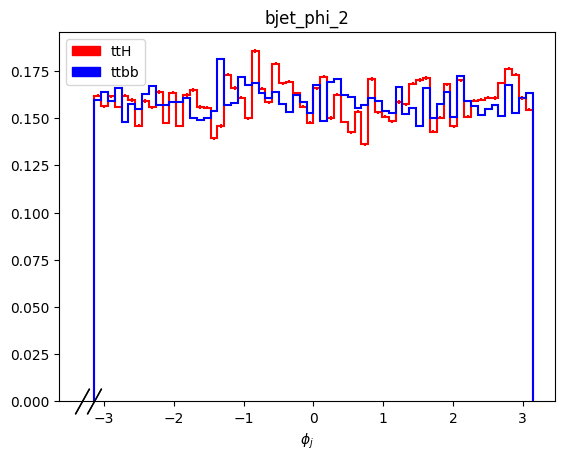

/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


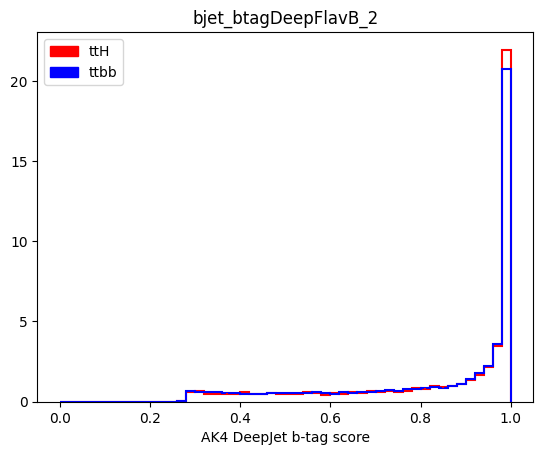

/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


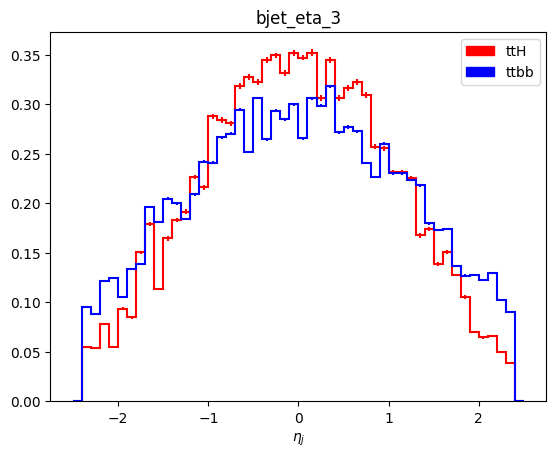

/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


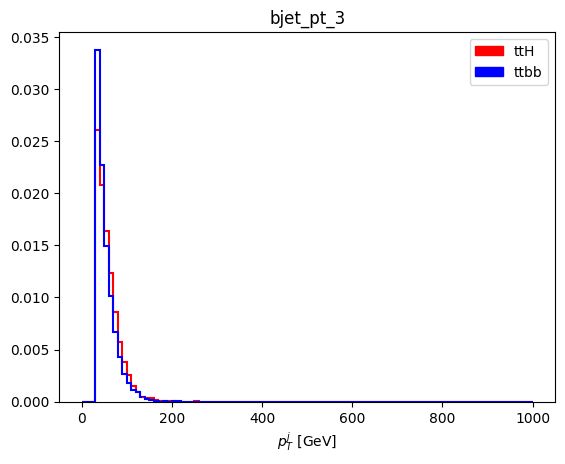

/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


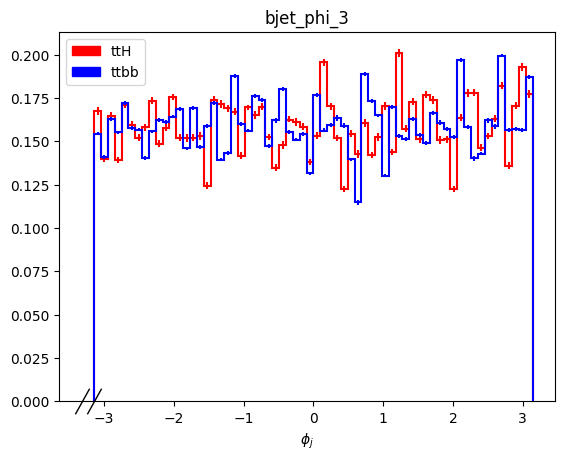

/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/ryanm124/pocket-coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


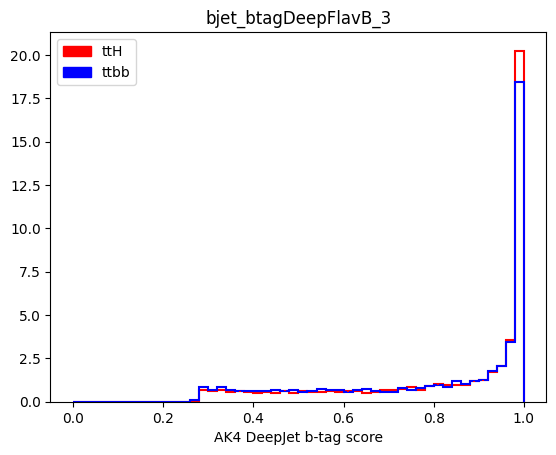

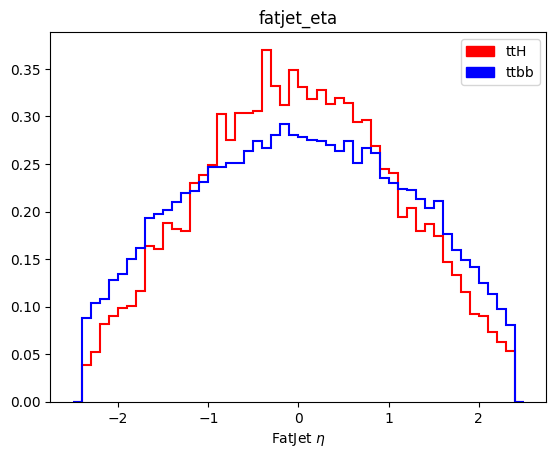

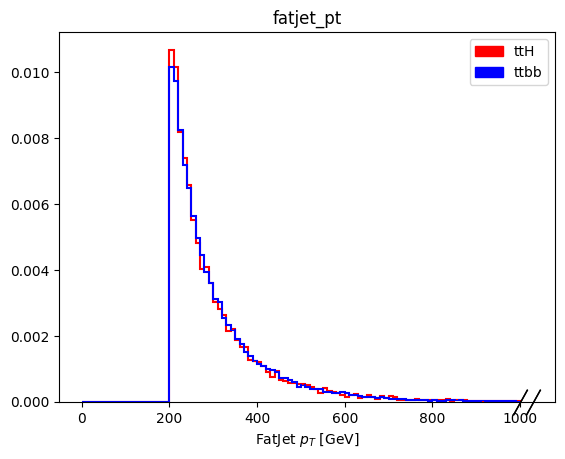

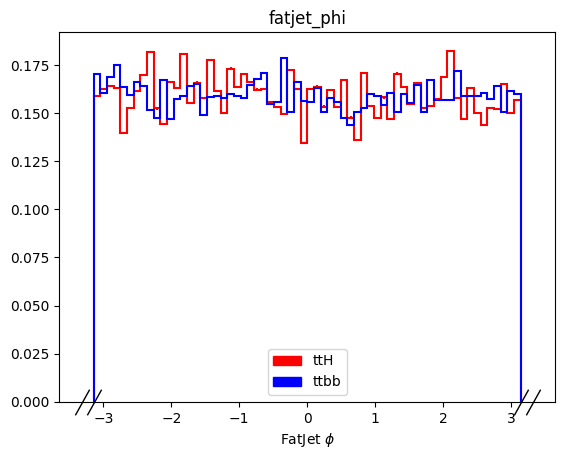

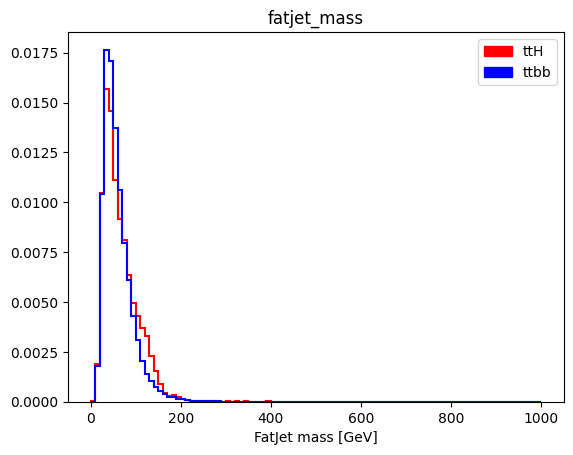

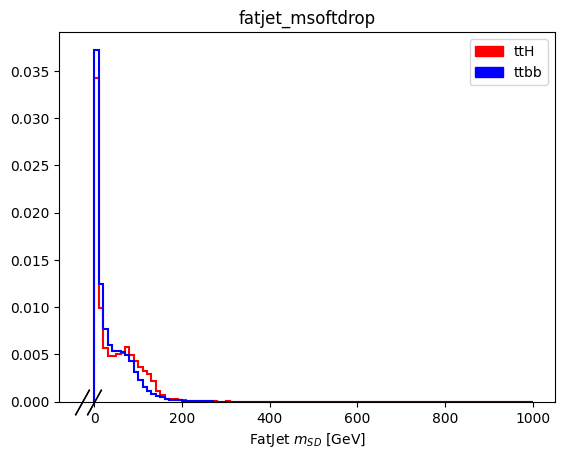

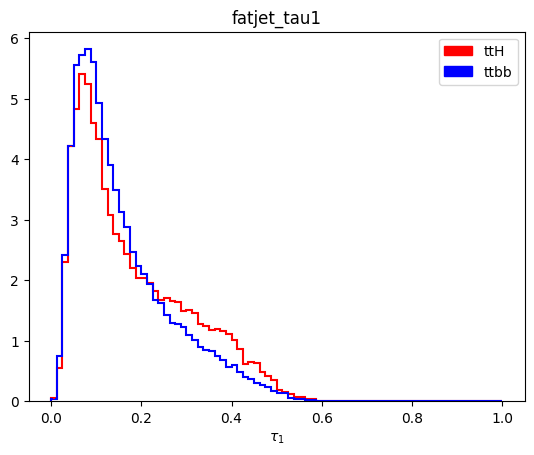

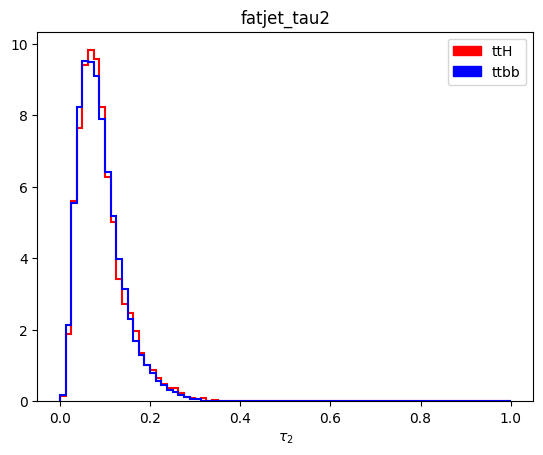

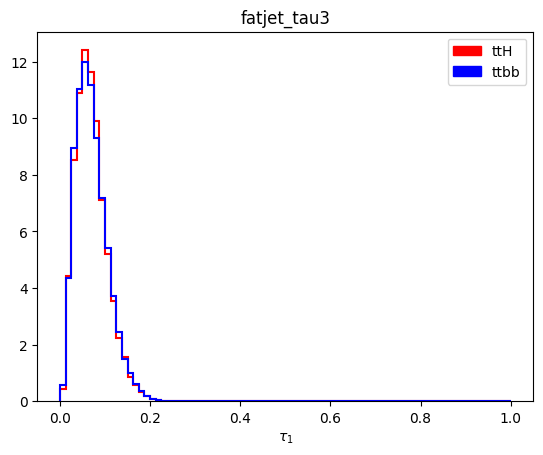

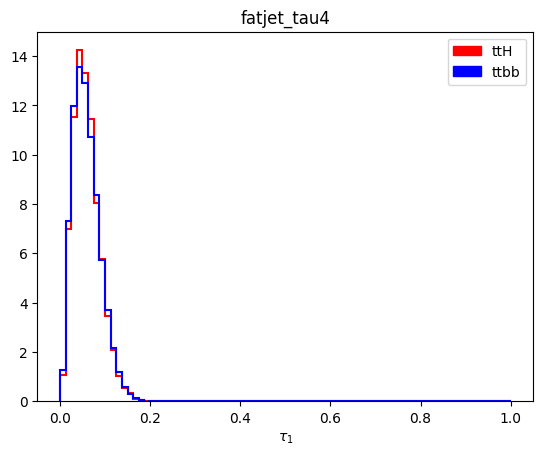

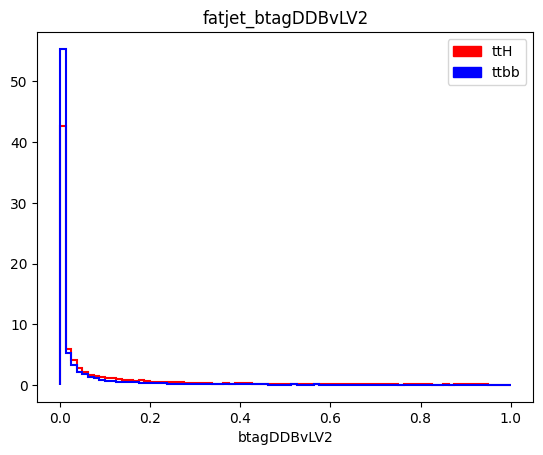

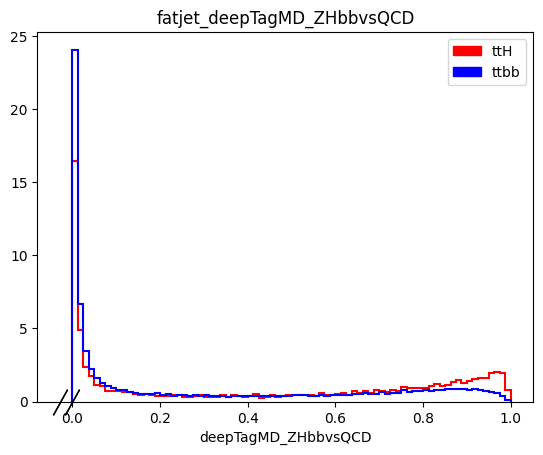

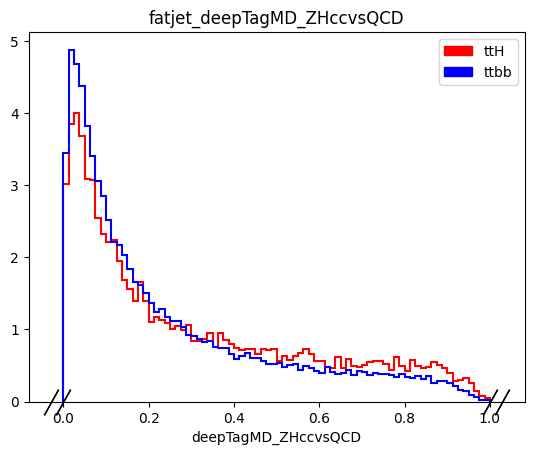

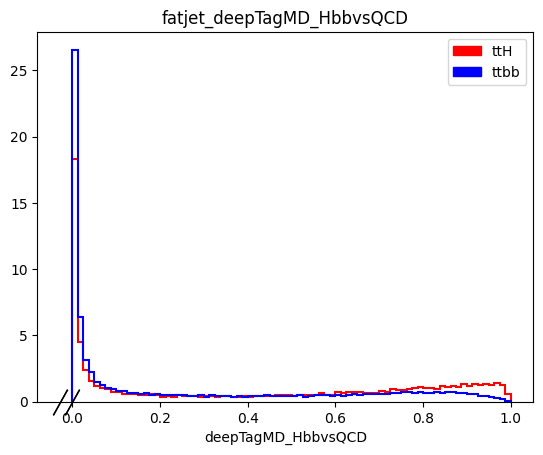

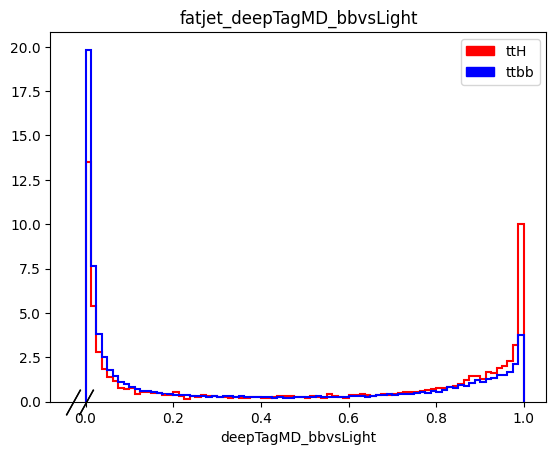

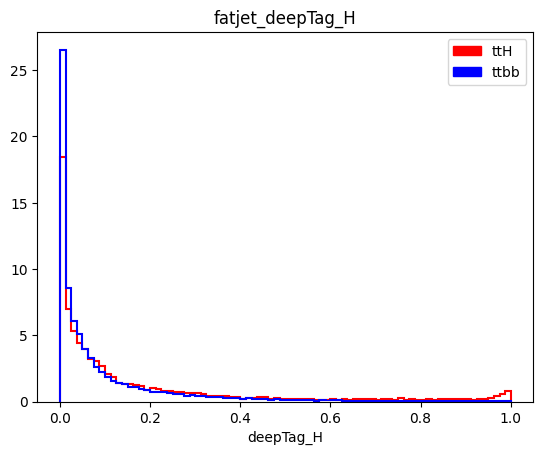

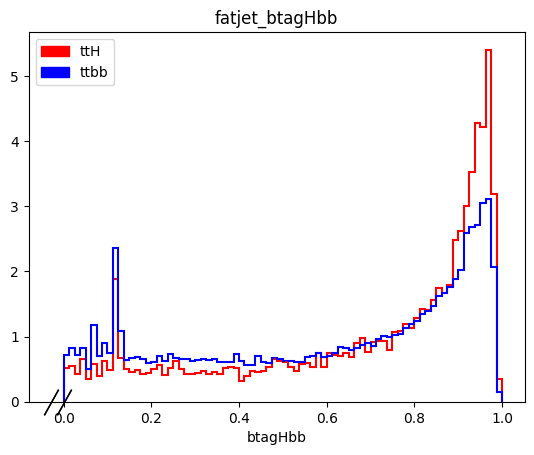

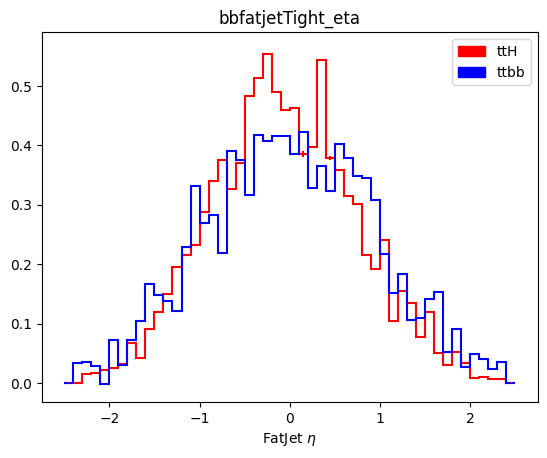

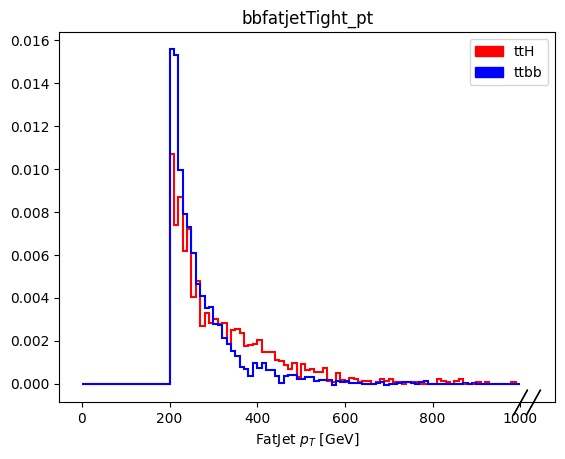

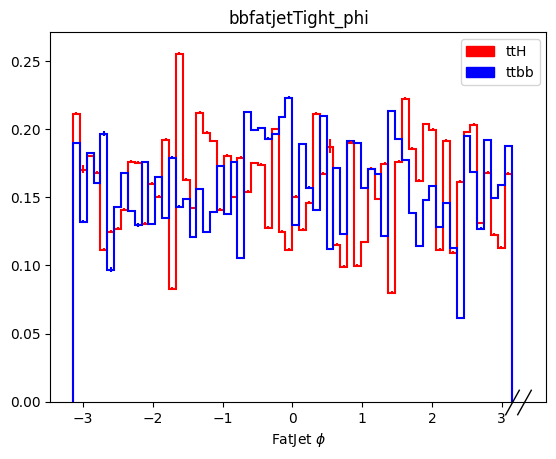

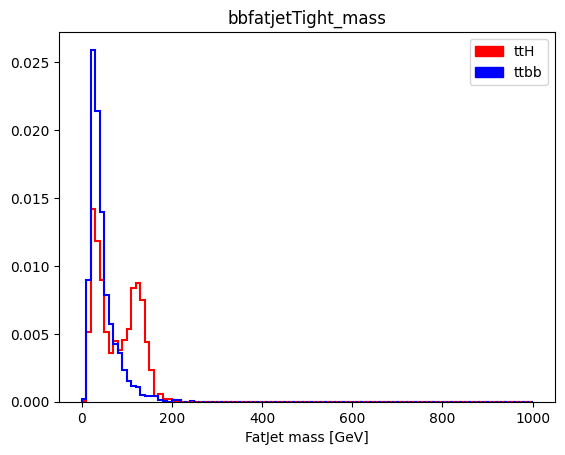

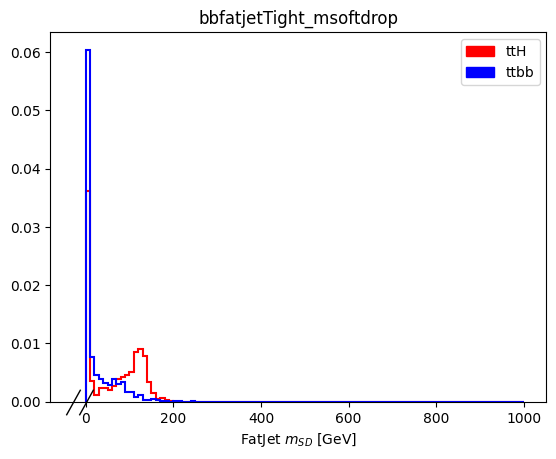

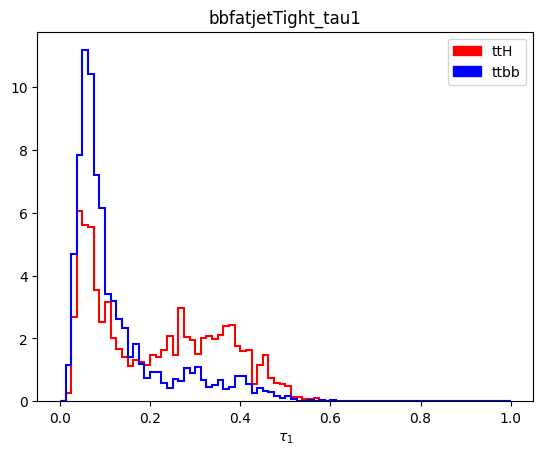

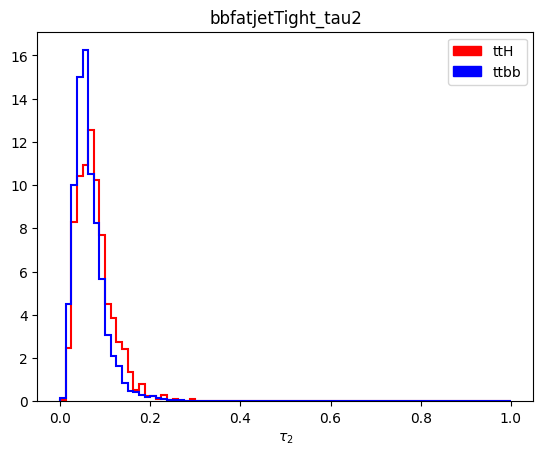

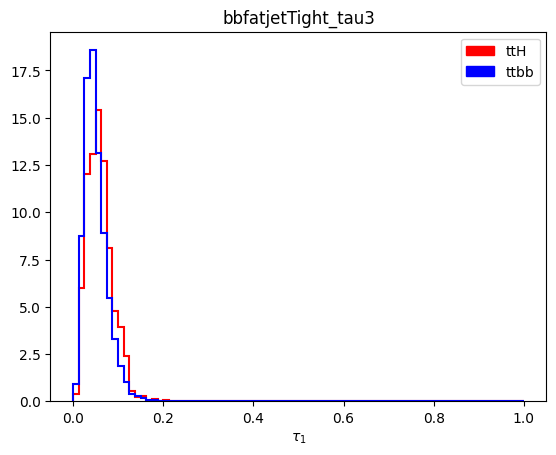

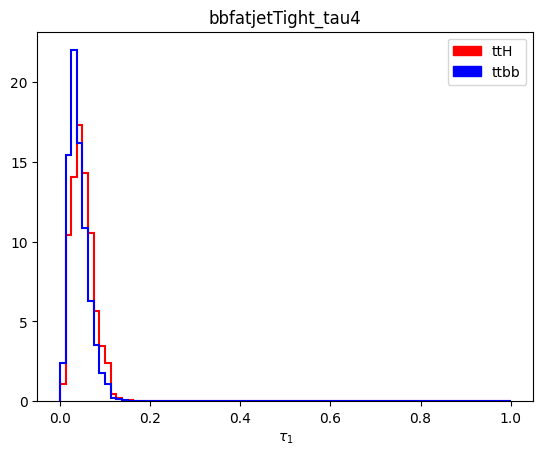

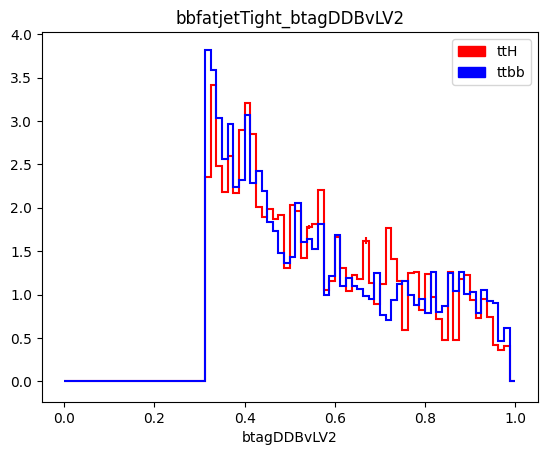

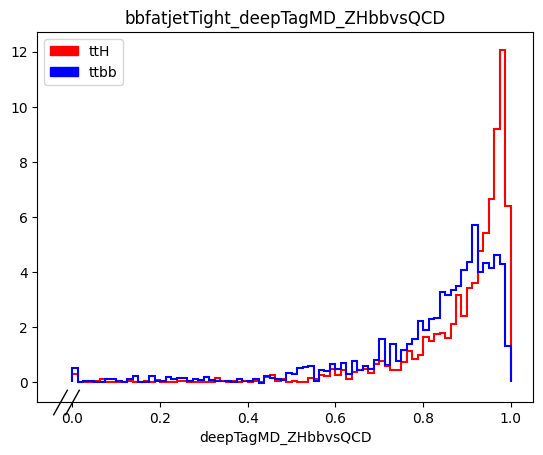

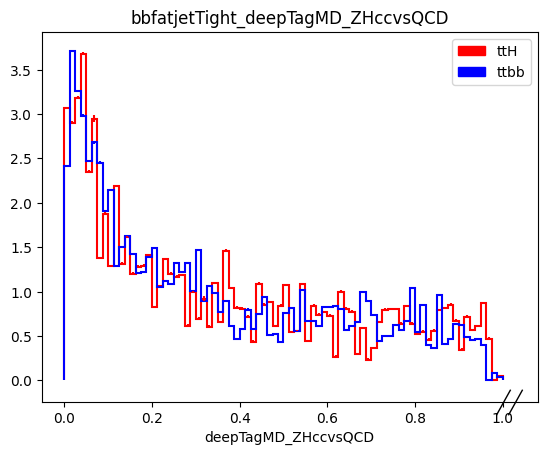

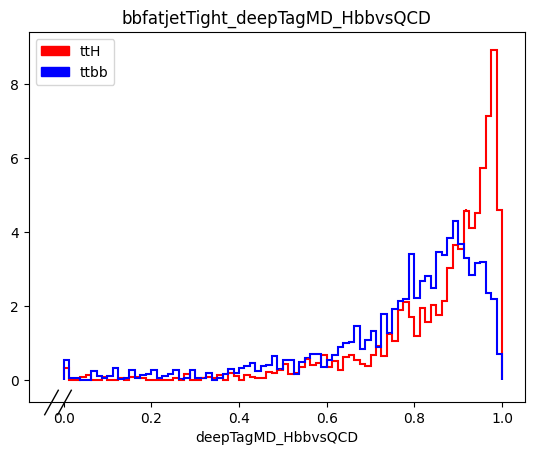

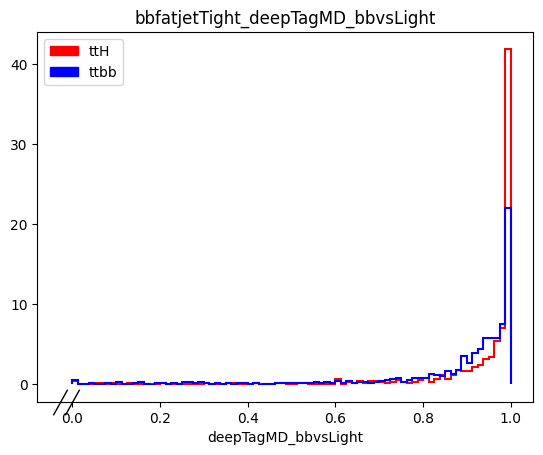

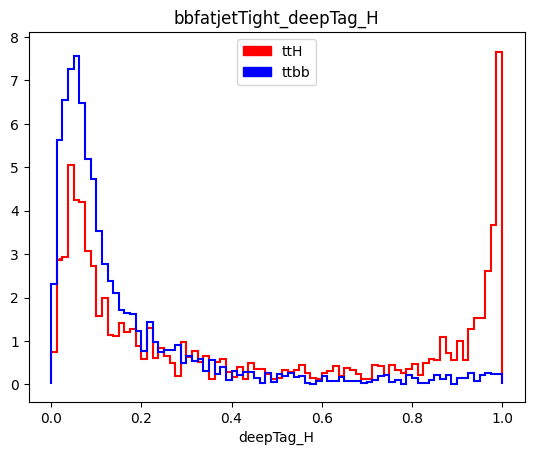

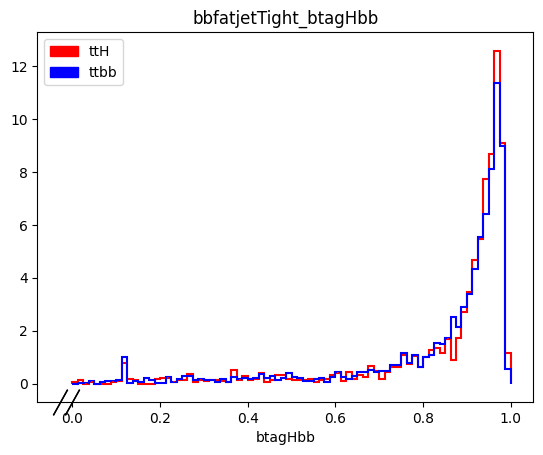

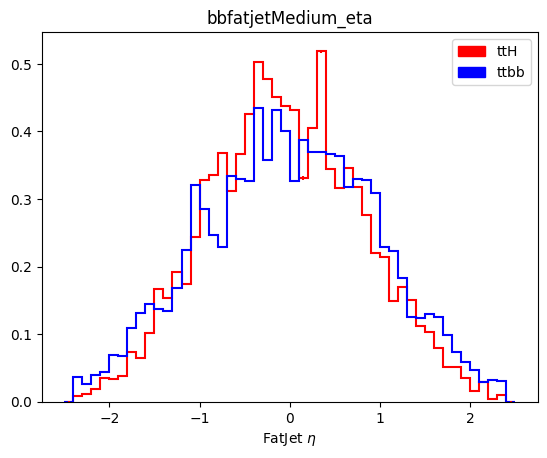

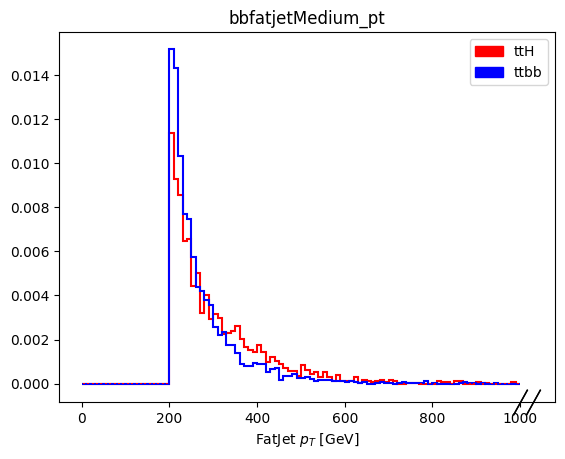

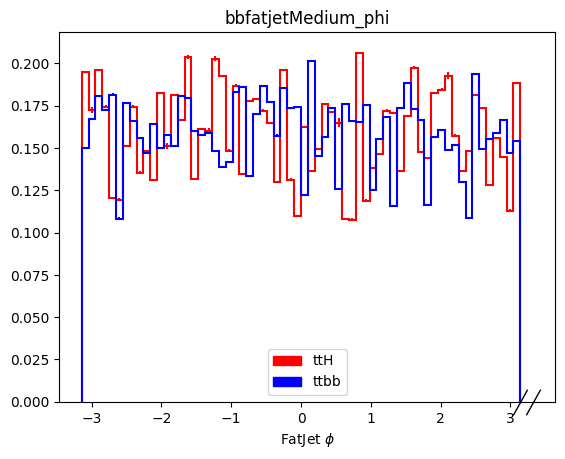

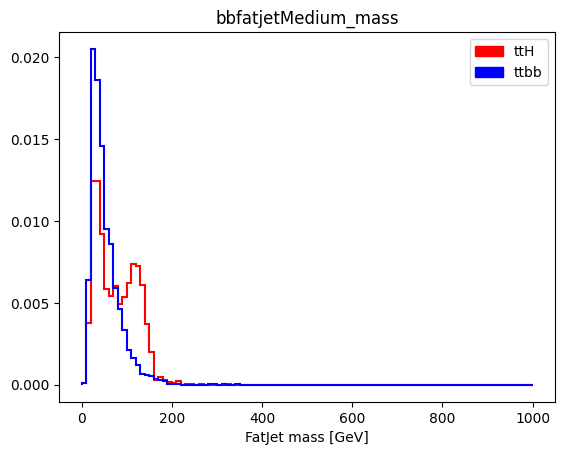

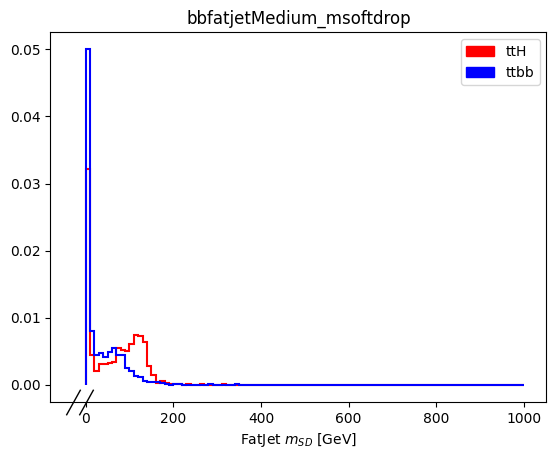

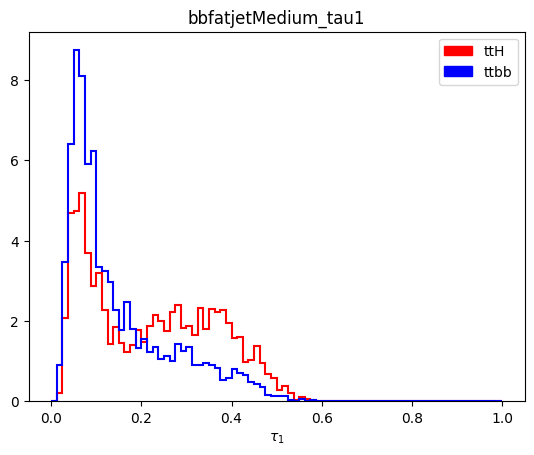

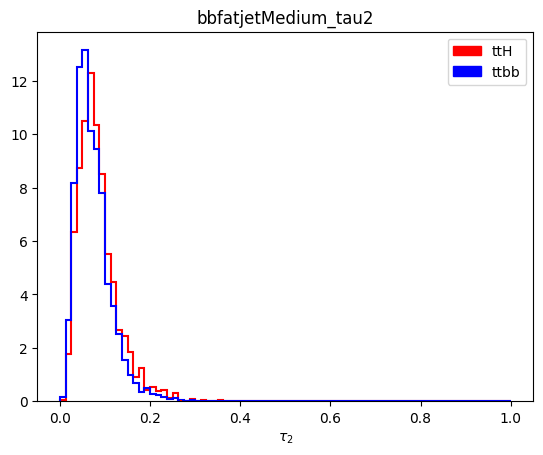

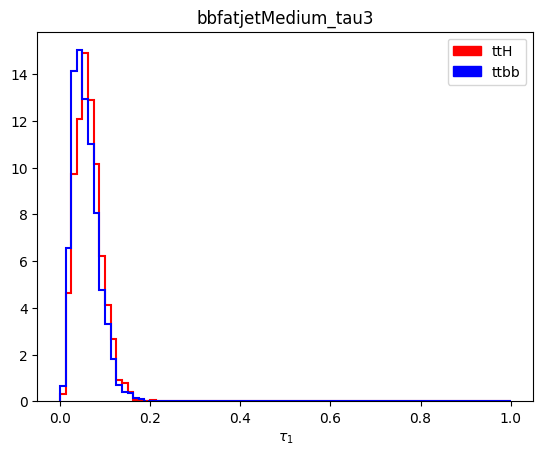

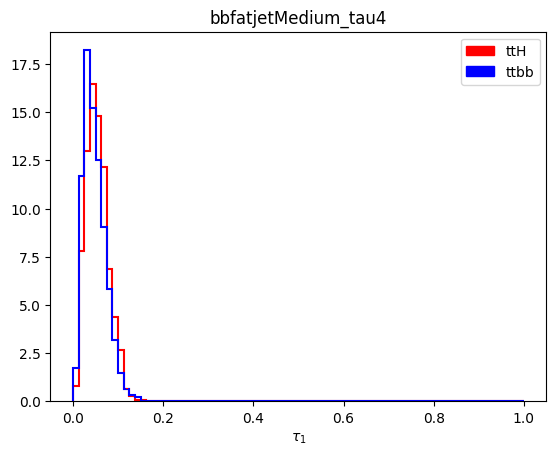

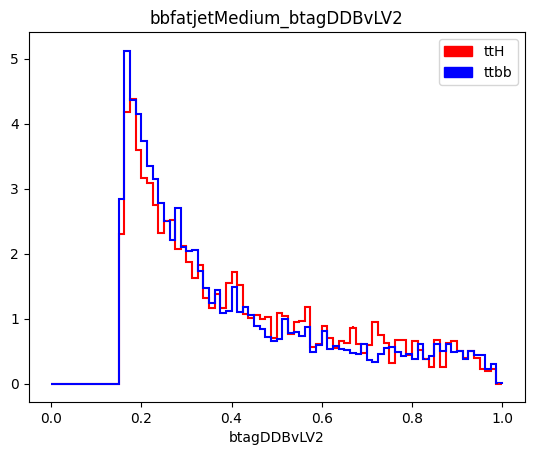

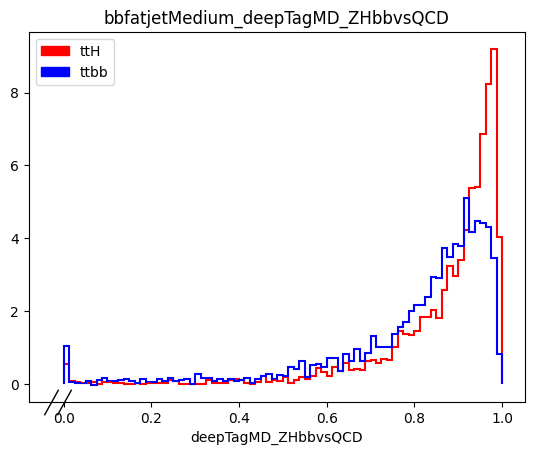

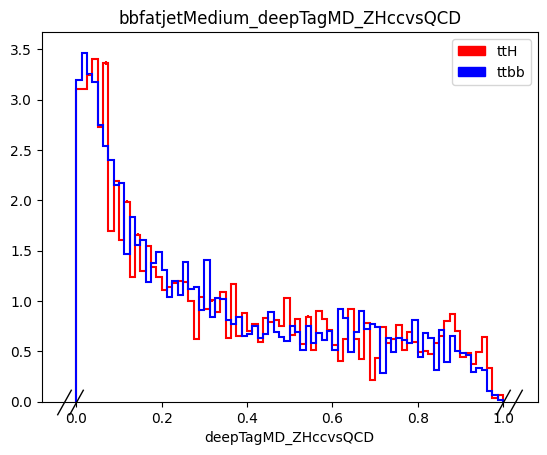

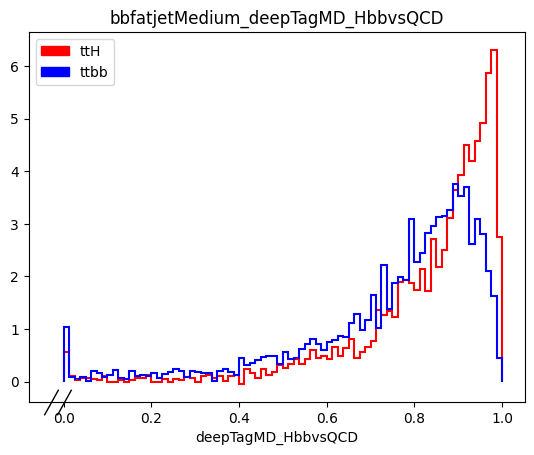

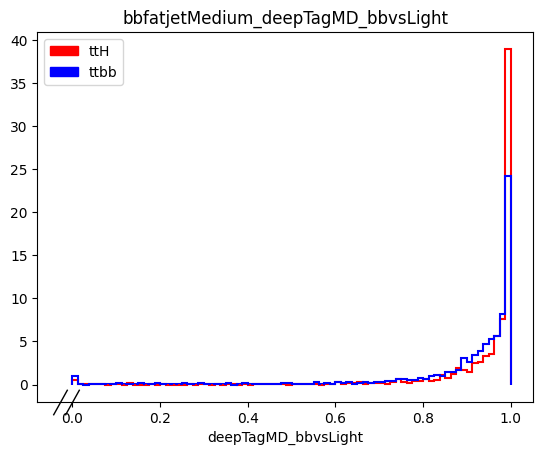

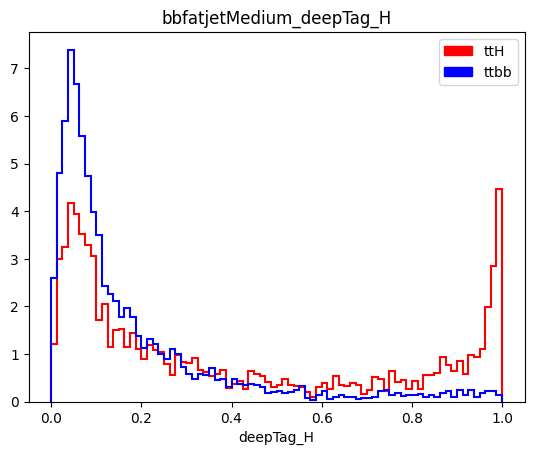

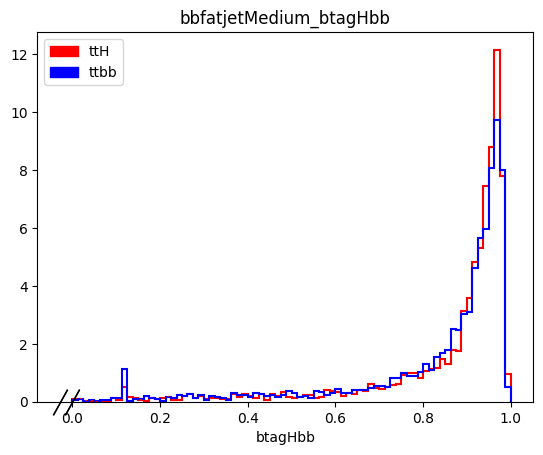

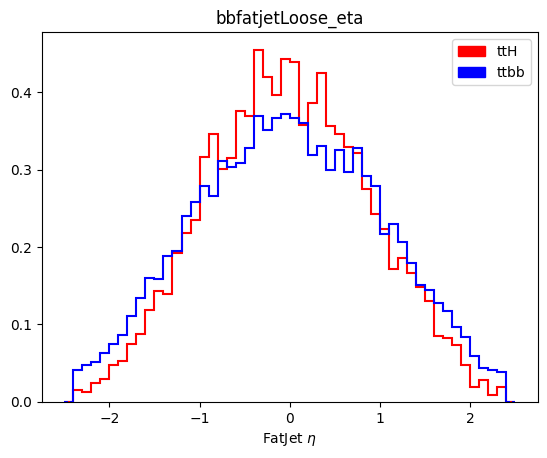

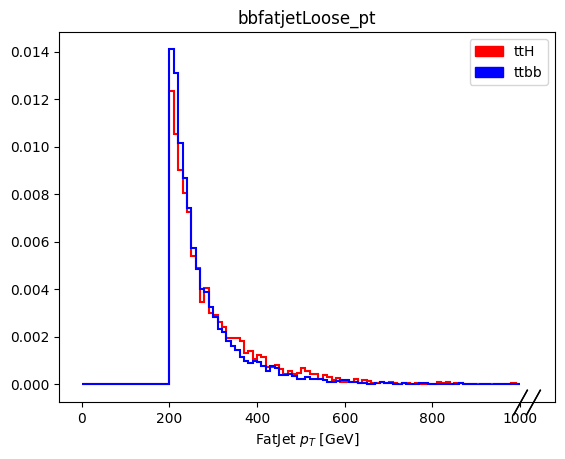

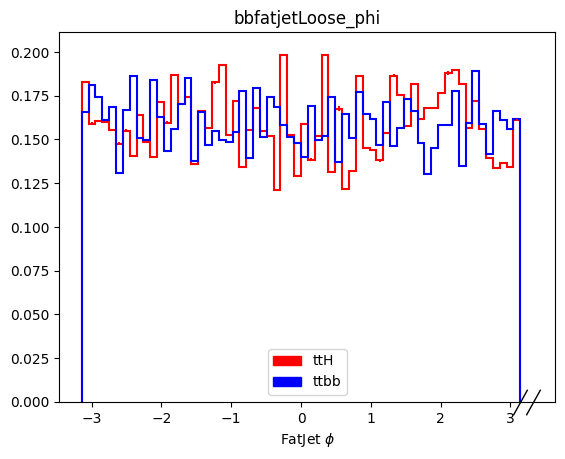

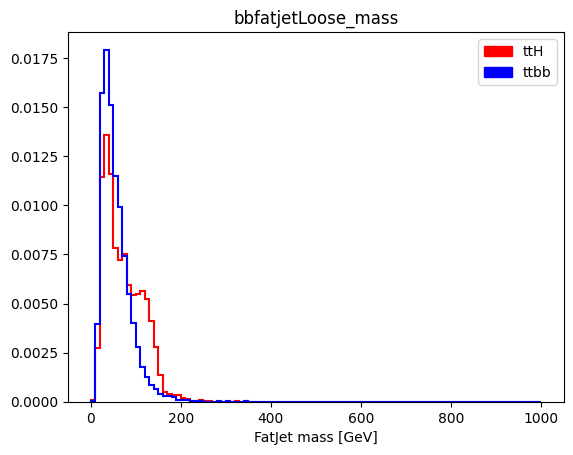

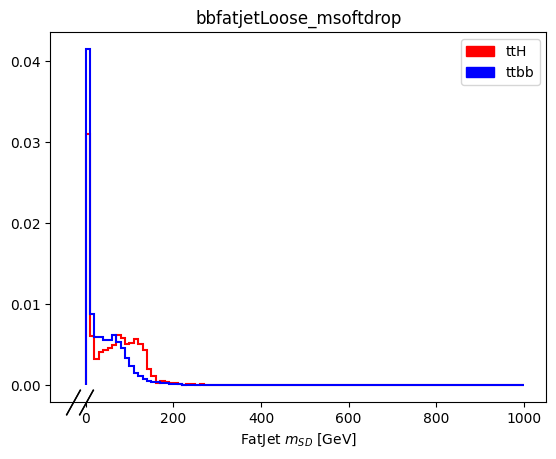

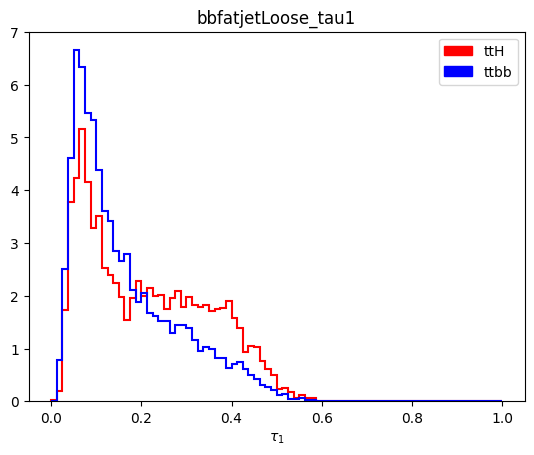

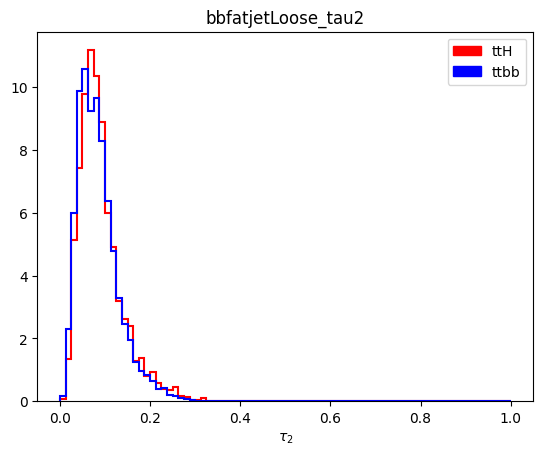

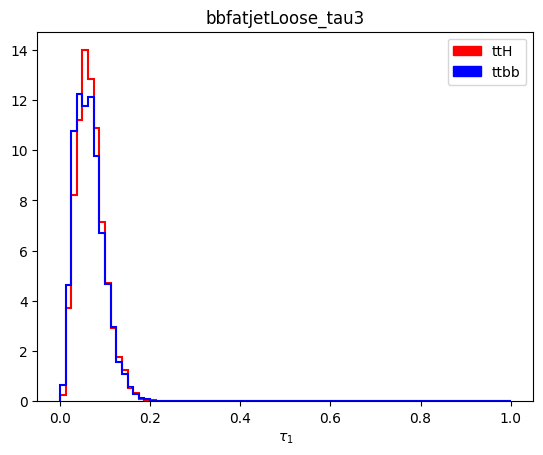

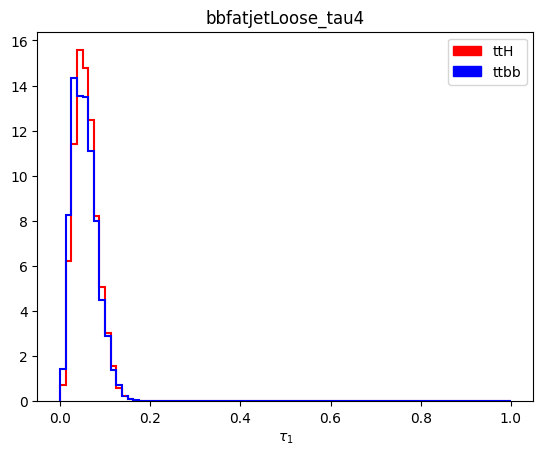

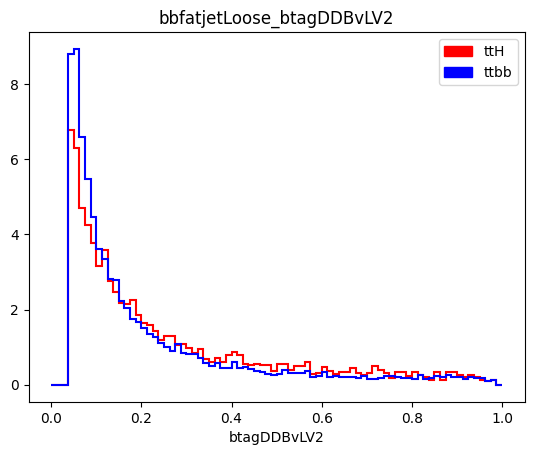

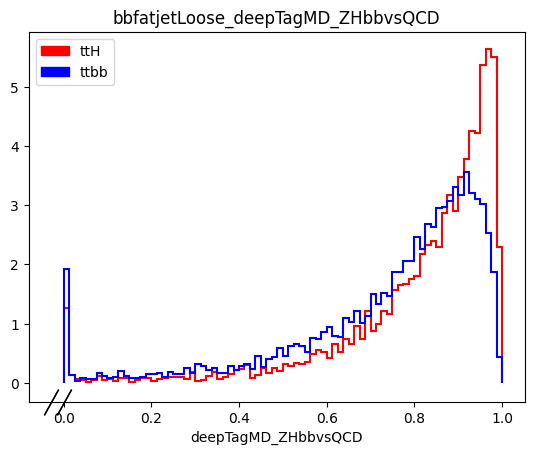

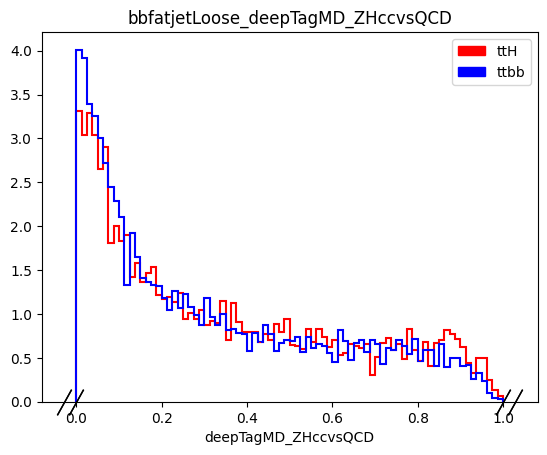

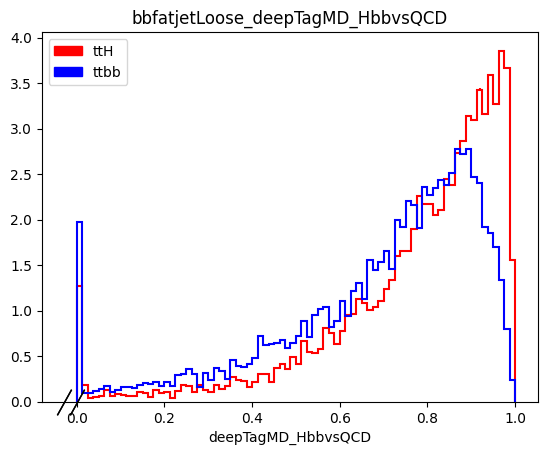

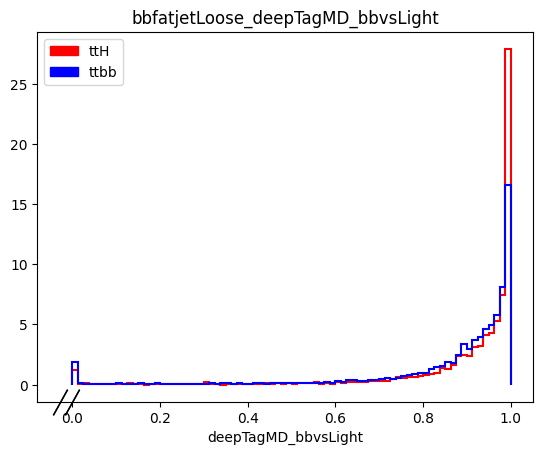

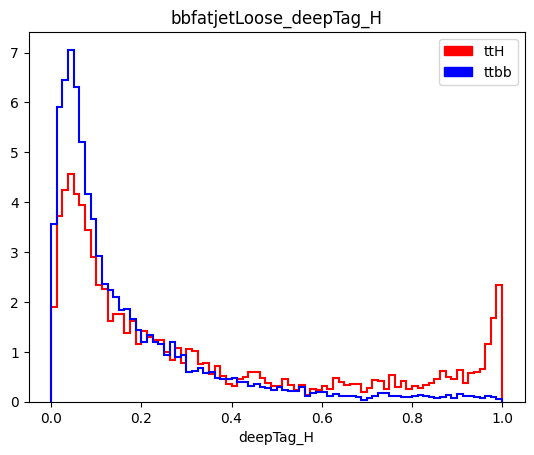

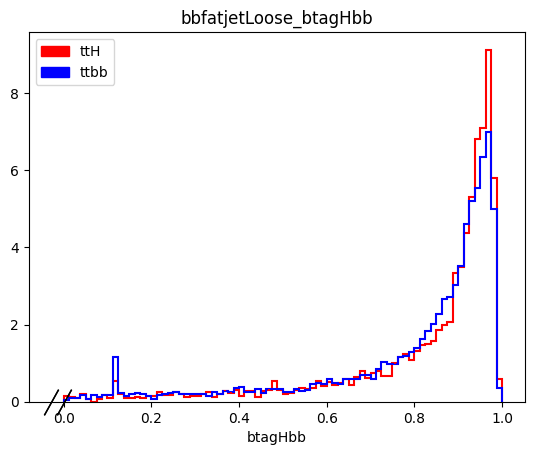

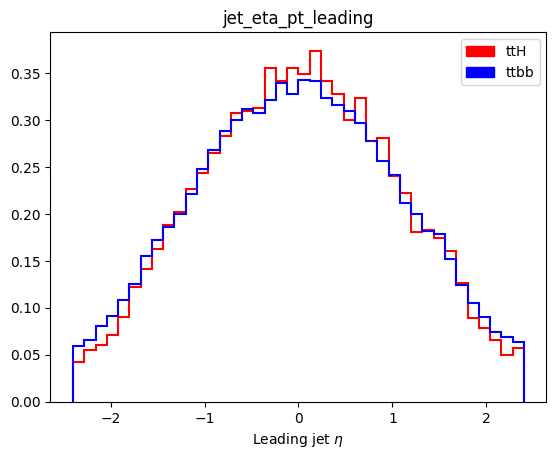

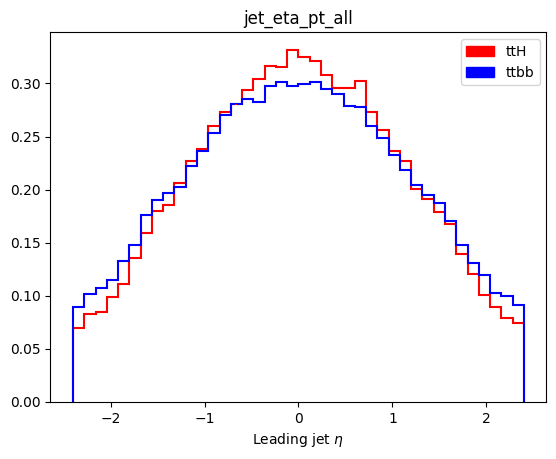

<Figure size 640x480 with 0 Axes>

In [110]:
for i, var_name in enumerate(fSignal['variables'].keys()):
    varHist = fSignal['variables'][var_name]['ttHTobb']['ttHTobb_2018']
    h1 = varHist.stack('cat').project(varHist.axes[-1].name)[:-1].plot(stack=True,density=True,histtype="step",color=['None','None','None','red'])
    bgHist = fBG['variables'][var_name]['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']
    h2 = bgHist.stack('cat').project(bgHist.axes[-1].name)[:-1].plot(stack=True,density=True,histtype="step",color=['None','None','None','blue'])
    plt.title(var_name)
    red_patch = mpatches.Patch(color='red', label='ttH')
    blue_patch = mpatches.Patch(color='blue', label='ttbb')
    plt.legend(handles=[red_patch, blue_patch])
    plt.show()
    plt.clf()

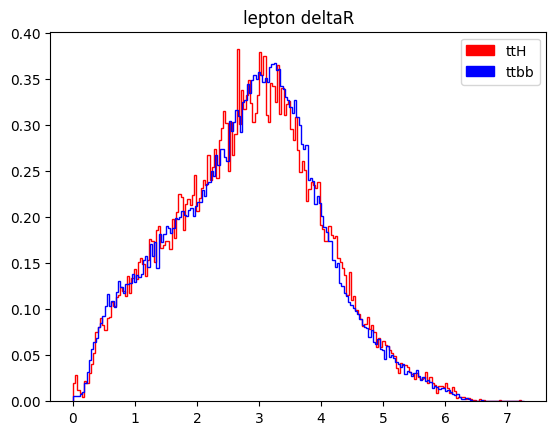

In [123]:
leptonsPhi = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['LeptonGood_phi'].value)
leptonsEta = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['LeptonGood_eta'].value)
leptonsN = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['LeptonGood_N'].value)
leptonsPhi = ak.unflatten(leptonsPhi,leptonsN)
leptonsPhi = ak.to_list(ak.combinations(leptonsPhi,2))
leptonsEta = ak.unflatten(leptonsEta,leptonsN)
leptonsEta = ak.to_list(ak.combinations(leptonsEta,2))

def deltaR(phis,etas):
    leftPhi,rightPhi = ak.unzip(phis)
    leftEta,rightEta = ak.unzip(etas)
    return np.sqrt(pow(leftEta-rightEta,2)+pow(leftPhi-rightPhi,2))

h1 = plt.hist(deltaR(leptonsPhi,leptonsEta),bins=200,color='red',density=True,histtype="step")

leptonsPhi = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['LeptonGood_phi'].value)
leptonsEta = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['LeptonGood_eta'].value)
leptonsN = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['LeptonGood_N'].value)
leptonsPhi = ak.unflatten(leptonsPhi,leptonsN)
leptonsPhi = ak.to_list(ak.combinations(leptonsPhi,2))
leptonsEta = ak.unflatten(leptonsEta,leptonsN)
leptonsEta = ak.to_list(ak.combinations(leptonsEta,2))
h2 = plt.hist(deltaR(leptonsPhi,leptonsEta),bins=200,color='blue',density=True,histtype="step")

red_patch = mpatches.Patch(color='red', label='ttH')
blue_patch = mpatches.Patch(color='blue', label='ttbb')
plt.legend(handles=[red_patch, blue_patch])
plt.title("lepton deltaR")
plt.show()

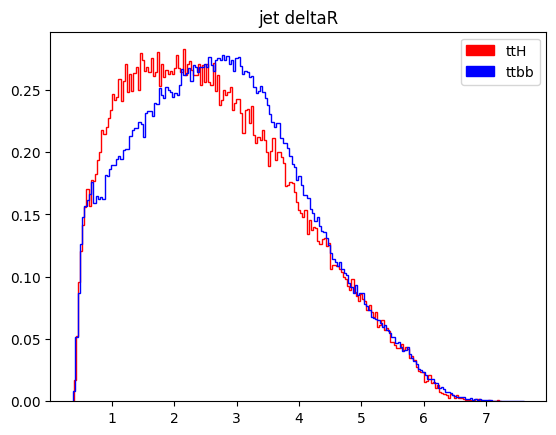

In [124]:
jetsPhi = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_phi'].value)
jetsEta = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_eta'].value)
jetsN = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_N'].value)
jetsPhi = ak.unflatten(jetsPhi,jetsN)
jetsPhi = ak.to_list(ak.combinations(jetsPhi,2))
jetsEta = ak.unflatten(jetsEta,jetsN)
jetsEta = ak.to_list(ak.combinations(jetsEta,2))
h1 = plt.hist(ak.flatten(deltaR(jetsPhi,jetsEta)),bins=200,color='red',density=True,histtype="step")

jetsPhi = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['JetGood_phi'].value)
jetsEta = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['JetGood_eta'].value)
jetsN = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['JetGood_N'].value)
jetsPhi = ak.unflatten(jetsPhi,jetsN)
jetsPhi = ak.to_list(ak.combinations(jetsPhi,2))
jetsEta = ak.unflatten(jetsEta,jetsN)
jetsEta = ak.to_list(ak.combinations(jetsEta,2))
h2 = plt.hist(ak.flatten(deltaR(jetsPhi,jetsEta)),bins=200,color='blue',density=True,histtype="step")
red_patch = mpatches.Patch(color='red', label='ttH')
blue_patch = mpatches.Patch(color='blue', label='ttbb')
plt.legend(handles=[red_patch, blue_patch])
plt.title("jet deltaR")
plt.show()

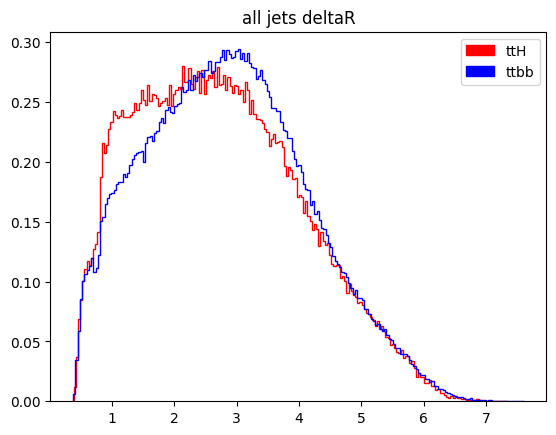

In [126]:
fatJetsPhi = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_phi'].value)
fatJetsEta = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_eta'].value)
fatJetsN = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_N'].value)
jetsPhi = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_phi'].value)
jetsEta = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_eta'].value)
jetsN = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_N'].value)
jetsPhi = ak.unflatten(jetsPhi,jetsN)
jetsEta = ak.unflatten(jetsEta,jetsN)
fatJetsPhi = ak.unflatten(fatJetsPhi,fatJetsN)
fatJetsEta = ak.unflatten(fatJetsEta,fatJetsN)
allJetsPhi = ak.concatenate([jetsPhi,fatJetsPhi],axis=1)
allJetsEta = ak.concatenate([jetsEta,fatJetsEta],axis=1)
allJetsPhi = ak.to_list(ak.combinations(allJetsPhi,2))
allJetsEta = ak.to_list(ak.combinations(allJetsEta,2))
h1 = plt.hist(ak.flatten(deltaR(allJetsPhi,allJetsEta)),bins=200,color='red',density=True,histtype="step")

fatJetsPhi = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['FatJetGood_phi'].value)
fatJetsEta = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['FatJetGood_eta'].value)
fatJetsN = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['FatJetGood_N'].value)
jetsPhi = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['JetGood_phi'].value)
jetsEta = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['JetGood_eta'].value)
jetsN = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['JetGood_N'].value)
jetsPhi = ak.unflatten(jetsPhi,jetsN)
jetsEta = ak.unflatten(jetsEta,jetsN)
fatJetsPhi = ak.unflatten(fatJetsPhi,fatJetsN)
fatJetsEta = ak.unflatten(fatJetsEta,fatJetsN)
allJetsPhi = ak.concatenate([jetsPhi,fatJetsPhi],axis=1)
allJetsEta = ak.concatenate([jetsEta,fatJetsEta],axis=1)
allJetsPhi = ak.to_list(ak.combinations(allJetsPhi,2))
allJetsEta = ak.to_list(ak.combinations(allJetsEta,2))
h2 = plt.hist(ak.flatten(deltaR(allJetsPhi,allJetsEta)),bins=200,color='blue',density=True,histtype="step")
red_patch = mpatches.Patch(color='red', label='ttH')
blue_patch = mpatches.Patch(color='blue', label='ttbb')
plt.legend(handles=[red_patch, blue_patch])
plt.title("all jets deltaR")
plt.show()

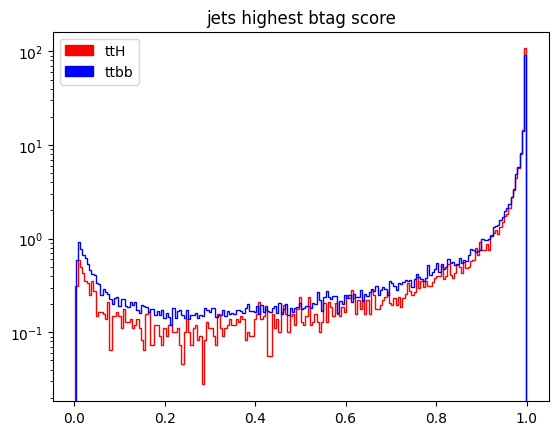

In [127]:
jetsBScore = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_btagDeepFlavB'].value)
jetsN = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_N'].value)
jetsBScore = ak.unflatten(jetsBScore,jetsN)
maxBScore = ak.max(jetsBScore,axis=1)
h1 = plt.hist(maxBScore,bins=200,color='red',density=True,histtype="step")

jetsBScore = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['JetGood_btagDeepFlavB'].value)
jetsN = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['JetGood_N'].value)
jetsBScore = ak.unflatten(jetsBScore,jetsN)
maxBScore = ak.max(jetsBScore,axis=1)
h2 = plt.hist(maxBScore,bins=200,color='blue',density=True,histtype="step")
plt.title("jets highest btag score")
red_patch = mpatches.Patch(color='red', label='ttH')
blue_patch = mpatches.Patch(color='blue', label='ttbb')
plt.legend(handles=[red_patch, blue_patch])
plt.semilogy()
plt.show()

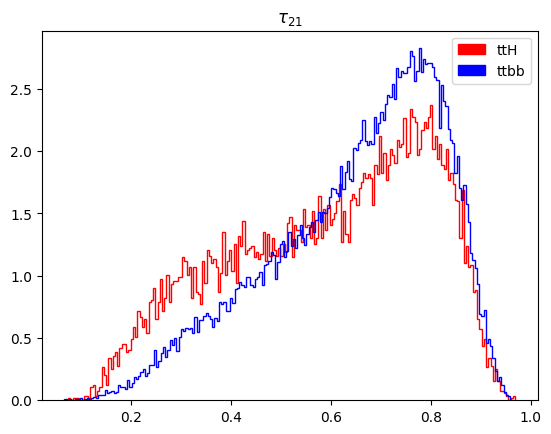

In [155]:
fatJetsTau1 = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_tau1'].value)
fatJetsTau2 = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_tau2'].value)
h1 = plt.hist(fatJetsTau2/fatJetsTau1,bins=200,color='red',density=True,histtype="step")

fatJetsTau1 = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['FatJetGood_tau1'].value)
fatJetsTau2 = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['FatJetGood_tau2'].value)
h1 = plt.hist(fatJetsTau2/fatJetsTau1,bins=200,color='blue',density=True,histtype="step")

red_patch = mpatches.Patch(color='red', label='ttH')
blue_patch = mpatches.Patch(color='blue', label='ttbb')
plt.legend(handles=[red_patch, blue_patch])
plt.title(r"$\tau_{21}$")
plt.show()

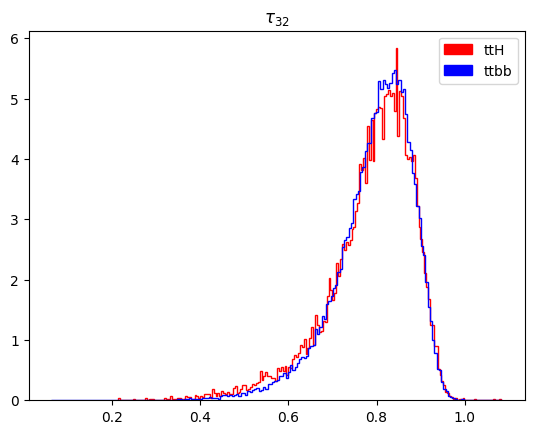

In [156]:
fatJetsTau2 = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_tau2'].value)
fatJetsTau3 = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_tau3'].value)
h1 = plt.hist(fatJetsTau3/fatJetsTau2,bins=200,color='red',density=True,histtype="step")

fatJetsTau2 = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['FatJetGood_tau2'].value)
fatJetsTau3 = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['FatJetGood_tau3'].value)
h1 = plt.hist(fatJetsTau3/fatJetsTau2,bins=200,color='blue',density=True,histtype="step")

red_patch = mpatches.Patch(color='red', label='ttH')
blue_patch = mpatches.Patch(color='blue', label='ttbb')
plt.legend(handles=[red_patch, blue_patch])
plt.title(r"$\tau_{32}$")
plt.show()

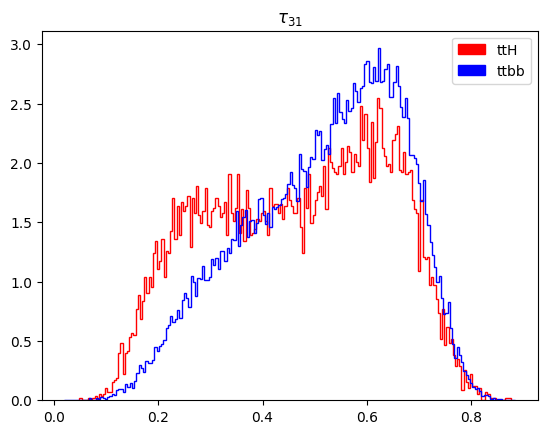

In [3]:
fatJetsTau1 = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_tau1'].value)
fatJetsTau3 = ak.from_numpy(fSignal['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_tau3'].value)
h1 = plt.hist(fatJetsTau3/fatJetsTau1,bins=200,color='red',density=True,histtype="step")

fatJetsTau1 = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['FatJetGood_tau1'].value)
fatJetsTau3 = ak.from_numpy(fBG['columns']['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']['baseline']['FatJetGood_tau3'].value)
h1 = plt.hist(fatJetsTau3/fatJetsTau1,bins=200,color='blue',density=True,histtype="step")

red_patch = mpatches.Patch(color='red', label='ttH')
blue_patch = mpatches.Patch(color='blue', label='ttbb')
plt.legend(handles=[red_patch, blue_patch])
plt.title(r"$\tau_{31}$")
plt.show()